Naive Bayes versus Logistic Regression using titles, subject, and content

Imports

In [1]:
#imports
import utility
import matplotlib.pyplot as plt
import time
import pickle

Preprocess data and obtain train-test split

In [2]:
#train set size of 80 percent
TRAIN_SIZE = 80

#get dataset using title, text, and subject columns
dataset = utility.GET_DATASET(["title","text","subject"])

#preprocess dataset and time preprocessing; print out preprocess time
prep_start = time.time()
preprocessed_data = utility.PREPROCESS([dataset[i][0] for i in range(len(dataset))],lowercase=False)
prep_end = time.time() - prep_start
print("Preprocess time in seconds:",prep_end)

#extract vocabulary and time extraction; print out extraction time
vocab_start = time.time()
vocabulary = utility.GET_VOCABULARY(preprocessed_data)
vocab_end = time.time()-vocab_start
print("Vocabulary extraction time in seconds:",vocab_end)

#apply train-test split and time; print out train-test split time
split_start = time.time()
traintest_data = [[preprocessed_data[i],dataset[i][1]] for i in range(len(dataset))]
X_train, X_test, y_train, y_test = utility.TRAIN_TEST_SPLIT(traintest_data,TRAIN_SIZE,len(dataset))
split_end = time.time()-split_start
print("Train-test split time in seconds:",split_end)

Preprocess time in seconds: 1.783325433731079
Vocabulary extraction time in seconds: 6.83112096786499
Train-test split time in seconds: 0.05939888954162598


Profile the dataset

Total dataset size: 44898
Total real news counts: 21417
Total fake news counts: 23481
Total training set size: 35918
Training set real news: 17080
Training set fake news: 18838
Total test set size: 8980
Test set real news: 4337
Test set fake news: 4643


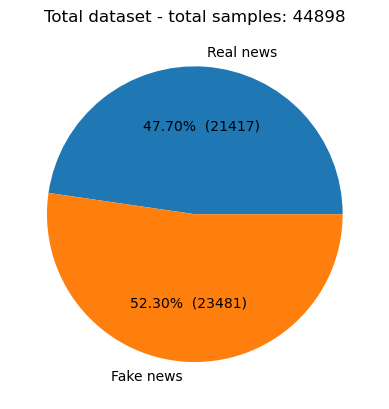

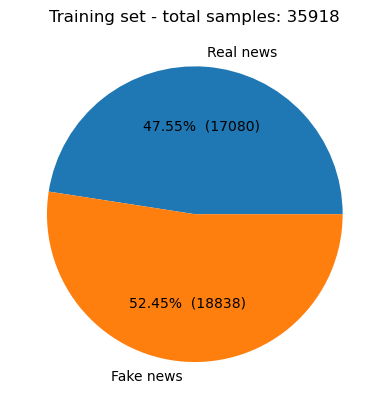

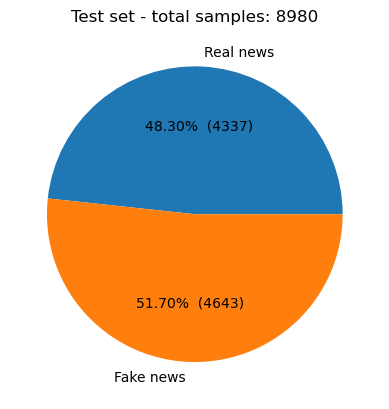

<Figure size 640x480 with 0 Axes>

In [3]:
#counts of all labels for the total dataset, train set, and test set
fake_counts = 0 
true_counts = 0
train_fake_counts = 0
train_true_counts = 0
test_fake_counts = 0
test_true_counts = 0

#count labels in train set, test set, and full dataset
for i in range(len(traintest_data)):
    if traintest_data[i][1]==0:
        true_counts+=1
    else:
        fake_counts+=1
for i in range(len(y_train)):
    if y_train[i]==0:
        train_true_counts+=1
    else:
        train_fake_counts+=1
        
for i in range(len(y_test)):
    if y_test[i]==0:
        test_true_counts+=1
    else:
        test_fake_counts+=1       

#compute full size of dataset, train set, and test set
total_data_count = fake_counts+true_counts
total_train = train_fake_counts + train_true_counts
total_test = test_fake_counts+test_true_counts

#print out all counts
print("Total dataset size:",total_data_count)
print("Total real news counts:",true_counts)
print("Total fake news counts:",fake_counts)
print("Total training set size:",total_train)
print("Training set real news:",train_true_counts)
print("Training set fake news:",train_fake_counts)
print("Total test set size:",total_test)
print("Test set real news:",test_true_counts)
print("Test set fake news:",test_fake_counts)

#function to display counts and percentages in pie charts
def new_autopct(values):
    def convert_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return convert_autopct
    
#pie chart of full dataset labels
counts = [true_counts,fake_counts]
dataset_labels = ["Real news", "Fake news"]
plt.pie(counts, labels = dataset_labels,autopct=new_autopct(counts))
plt.title("Total dataset - total samples: "+str(total_data_count))
plt.show() 
plt.clf()
 
#pie chart of train set labels
counts = [train_true_counts,train_fake_counts]
dataset_labels = ["Real news", "Fake news"]
plt.pie(counts, labels = dataset_labels,autopct=new_autopct(counts))
plt.title("Training set - total samples: "+str(total_train))
plt.show() 
plt.clf()

#pie chart of test set labels
counts = [test_true_counts,test_fake_counts]
dataset_labels = ["Real news", "Fake news"]
plt.pie(counts, labels = dataset_labels,autopct=new_autopct(counts))
plt.title("Test set - total samples: "+str(total_test))
plt.show() 
plt.clf()

Train Naive Bayes model

In [4]:
#use to display ROC curves
ROC_curve_NB = [[0],[0]]
ROC_curve_LR = [[0],[0]]
ROC_curve_LR_ext = [[],[]]

#train Naive Bayes model and time training; print out training time
NB_train_start = time.time()
model = utility.TRAINER(X_train,y_train,vocabulary,0,batch_size=128)
NB_train_end = time.time() - NB_train_start
print("Naive Bayes training time in seconds:",NB_train_end)

Naive Bayes training time in seconds: 2802.0316603183746


Test Naive Bayes and display metrics

In [5]:
#test Naive Bayes and time testing; print out testing time
NB_test_start = time.time()
predictions = utility.TESTER(X_test, model, vocabulary,batch_size=128)
NB_test_end = time.time() - NB_test_start
print("Naive Bayes testing time in seconds:",NB_test_end)

#compute metrics from testing Naive Bayes
metrics = utility.EVALUATE(predictions, y_test)
#complete items needed for Naive Bayes ROC curve
ROC_curve_NB[0].append(metrics[0]/(metrics[0]+metrics[3]))
ROC_curve_NB[1].append(metrics[2]/(metrics[2]+metrics[1]))
ROC_curve_NB[0].append(1)
ROC_curve_NB[1].append(1)

#display Naive Bayes metrics
print("Naive Bayes metrics")
print("Test results / metrics:")
print("Number of true positives: "+str(metrics[0]))
print("Number of true negatives: "+str(metrics[1]))
print("Number of false positives: "+str(metrics[2]))
print("Number of false negatives: "+str(metrics[3]))
print("Sensitivity (recall): "+str(metrics[4]))
print("Specificity: "+str(metrics[5]))
print("Precision: "+str(metrics[6]))
print("Negative predictive value: "+str(metrics[7]))
print("Accuracy: "+str(metrics[8]))
print("F-score: "+str(metrics[9]))

Naive Bayes testing time in seconds: 358.0091438293457
Naive Bayes metrics
Test results / metrics:
Number of true positives: 4643
Number of true negatives: 521
Number of false positives: 3816
Number of false negatives: 0
Sensitivity (recall): 1.0
Specificity: 0.12012912151256629
Precision: 0.5488828466721835
Negative predictive value: 1.0
Accuracy: 0.5750556792873052
F-score: 0.7087467562204244


Train Logistic Regression

In [6]:
#train Logistic Regression and time training; print out training time
LR_train_start = time.time()
model = utility.TRAINER(X_train,y_train,vocabulary,1,batch_size=128)
LR_train_end = time.time() - LR_train_start  
print("Logistic Regression training time in seconds:",LR_train_end)

Logistic Regression training time in seconds: 2394.4700136184692


Test Logistic Regression and display metrics

In [7]:
#test Logistic Regression model at different classification thresholds for its own ROC curve    
for t in range(0,11):
    
    predictions = utility.TESTER(X_test, model, vocabulary,batch_size=128,threshold=t/10)
        
    metrics = utility.EVALUATE(predictions, y_test)
    
    ROC_curve_LR_ext[0].append(metrics[0]/(metrics[0]+metrics[3]))
    ROC_curve_LR_ext[1].append(metrics[2]/(metrics[2]+metrics[1]))
#complete items needed for Logistic Regression ROC curve using multiple thresholds   
ROC_curve_LR_ext[0].append(1)
ROC_curve_LR_ext[1].append(1)
    
#test Logistic Regression again at .5 threshold to compare with Naive Bayes
#time testing and print out time
LR_test_start = time.time()
predictions = utility.TESTER(X_test, model, vocabulary,batch_size=128,threshold=.5)
LR_test_end = time.time()-LR_test_start
print("Logistic Regression testing time in seconds:",LR_test_end)

#compute metrics for Logistic Regression at .5 threshold
metrics = utility.EVALUATE(predictions, y_test)
#complete items needed for Logistic Regression ROC curve
ROC_curve_LR[0].append(metrics[0]/(metrics[0]+metrics[3]))
ROC_curve_LR[1].append(metrics[2]/(metrics[2]+metrics[1]))
ROC_curve_LR[0].append(1)
ROC_curve_LR[1].append(1)

#print out Logistic Regression metrics
print("Logistic regression metrics at a classification threshold of .5")
print("Test results / metrics:")
print("Number of true positives: "+str(metrics[0]))
print("Number of true negatives: "+str(metrics[1]))
print("Number of false positives: "+str(metrics[2]))
print("Number of false negatives: "+str(metrics[3]))
print("Sensitivity (recall): "+str(metrics[4]))
print("Specificity: "+str(metrics[5]))
print("Precision: "+str(metrics[6]))
print("Negative predictive value: "+str(metrics[7]))
print("Accuracy: "+str(metrics[8]))
print("F-score: "+str(metrics[9]))        

Logistic Regression testing time in seconds: 349.18621730804443
Logistic regression metrics at a classification threshold of .5
Test results / metrics:
Number of true positives: 4154
Number of true negatives: 4274
Number of false positives: 63
Number of false negatives: 489
Sensitivity (recall): 0.8946801636872712
Specificity: 0.9854738298362924
Precision: 0.9850604695281006
Negative predictive value: 0.8973336132689481
Accuracy: 0.9385300668151447
F-score: 0.9376975169300227


Plot ROC curve of Naive Bayes against Logistic Regression

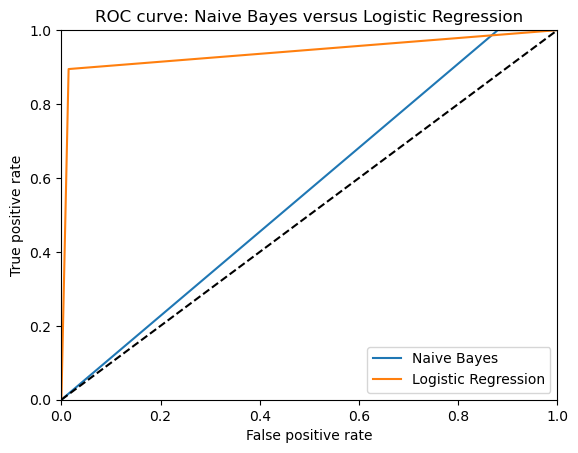

<Figure size 640x480 with 0 Axes>

In [8]:
#plot ROC curve for Naive Bayes and Logistic Regression
plt.plot(ROC_curve_NB[1],ROC_curve_NB[0],label="Naive Bayes")
plt.plot(ROC_curve_LR[1],ROC_curve_LR[0],label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve: Naive Bayes versus Logistic Regression")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
plt.clf()

Plot ROC curve for Logistic Regression at multiple thresholds

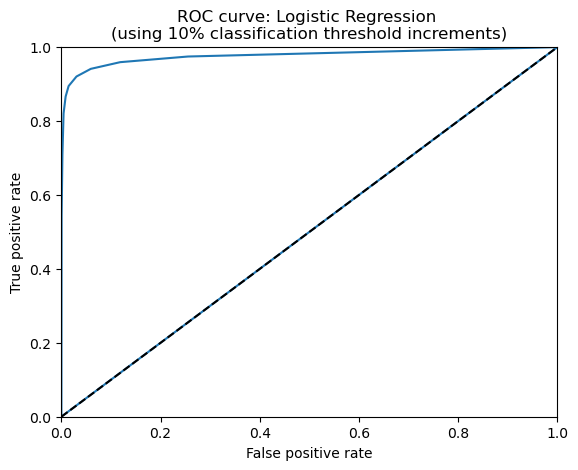

<Figure size 640x480 with 0 Axes>

In [9]:
#plot ROC curve for Logistic Regression tested at multiple thresholds.
plt.plot(ROC_curve_LR_ext[1],ROC_curve_LR_ext[0])
plt.plot([0,1], [0,1], linestyle='dashed', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve: Logistic Regression \n(using 10% classification threshold increments)")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
plt.clf()